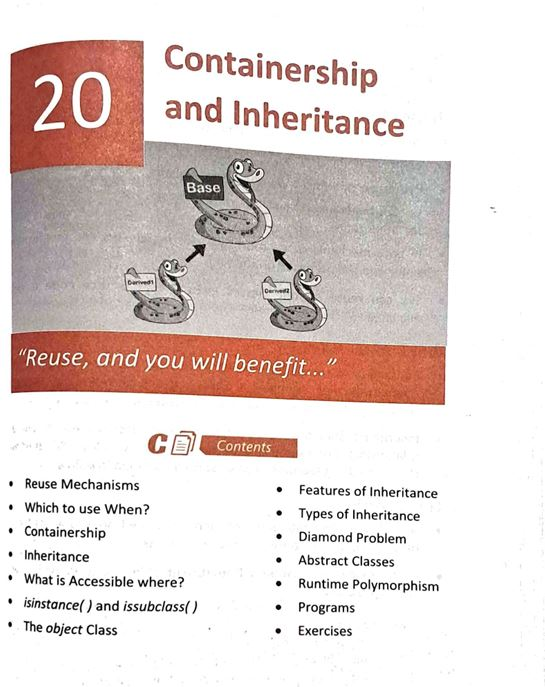

## <a id='link1'></a> **`19.Intricacies of Classes and objects`**

- [01. Reuse Mechanisms](#sub20-1)  
- [02. Which to use When?](#sub20-2)  
- [03. Containership](#sub20-3)  
- [04. Inheritance](#sub20-4)  
- [05. What is Accessible where?](#sub20-5)  
- [06. Isinstance() and issubclass()](#sub20-6)  
- [07. Features of Inheritance](#sub20-7)
- [08. Types of Inheritance](#sub20-8)
- [09. Diamond Problem](#sub20-9)
- [10. Abstract Classes](#sub20-10)
- [11. Runtime Polymorphism](#sub20-11)
- [12. Programs](#sub20-12)  
- [13. Exercises](#sub20-13)

### <a id="sub19-1"><a/>**`1. Reuse Mechanisms`**

- Instead of reinventing the same code that is already available, it makes sense in reusing existing code.
- Python permits two code reuse mechanisms:
  1. Containeriship (also called composition)  
  2. Inheritance
- In both mechanisms we can reuse existing classes and create new enhanced classes based on them.
- We can reuse existing classes even if their source code is not available.

---

### <a id="sub19-2"><a/>**`2. Which to use When?`**

- **Containership** should be used when the two classes have a ‘has a’ relationship. For example, a College has Professors. So, College class’s object can contain one or more Professor class’s object(s).
- **Inheritance** should be used when the two classes have a ‘like a’ relationship. For example, a Button is like a Window. So, Button class can inherit features of an existing class called Window.

---

### <a id="sub19-3"><a/>**`3. Containership`**

- A container can contain one or more contained objects apart from other data, thereby reusing contained objects.
- In the following program a Department object is contained in an Employee object.

```python
class Department:
    def set_department(self):
        self._id = input('Enter department id: ')
        self._name = input('Enter department name: ')

    def display_department(self):
        print('Department ID is:', self._id)
        print('Department Name is:', self._name)

class Employee:
     def set_employee(self):
        self.__eid = input('Enter employee id: ')
        self.__ename = input('Enter employee name: ')
        self.__dobj = Department()
        self.__dobj.set_department()

    def display_employee(self):
        print('Employee ID :', self.__eid)
        print('Employee Name :', self.__ename)
        self.__dobj.display_department()

obj = Employee()
obj.set_employee()
obj.display_employee()

```
- **Given below is the sample interaction with this program:**
```python
Enter employee id: 101
Enter employee name: Ramesh
Enter department id: ME
Enter department name: Mechanical Engineering
Employee ID : 101
Employee Name : Ramesh
Department ID is: ME
Department Name is: Mechanical Engineering

### <a id="sub19-4"><a/>**`4. Inheritance`**
- In Inheritance a new class called derived class can be created to inherit features of an existing class called base class.
- Base class is also called super class or parent class.
- Derived class is also called sub class or child class.
- In the following program Index is the base class and NewIndex is the derived class. Note the definition of NewIndex class. The mention of Index within parentheses indicates that NewIndex is being inherited from Index class.
```python
# base class
class Index:
    def __init__(self):
        self._count = 0
        
    def display(self):
        print('count = ' + str(self._count))

    def incr(self):
        self._count += 1

# derived class
class NewIndex(Index):
    def __init__(self):
        super().__init__()

    def decr(self):
        self._count -= 1

i = NewIndex()
i.incr()
i.incr()
i.incr()
i.display()
i.decr()
i.display()
i.decr()
i.display()

```
- **On execution of this program, we get the following output:**

```python
count = 3
count = 2
count = 1
```
- Construction of an object should always proceed from base towards derived.
- So when we create the derived class object, base class `__init__()` followed by derived class `__init__()` should get called. The syntax used for calling base class constructor is `super().__init__().`
- Derived class object contains all base class data. So _count is available in derived class.
- When `incr()` is called using derived class object, first it is searched in derived class. Since it is not found here, the search is continued in the base class.

---

### <a id ="sub19-5"><a/> **`5. What is Accessible where?`**

- Derived class members can access base class members, vice versa is not true.
- There are no keywords in Python to control access of base class members from derived class or from outside the class hierarchy.
- Instead, a convention that suggests the desired access is used while creating variable names or method names. This convention is shown below:

| Prefix         | Meaning                                              |
|----------------|---------------------------------------------
|  `Var`         | access it from anywhere in the program               |---------|
| `_var`access it only from within the class or its subclass he program |
| `__var`        | access it only from withi               its subclass |

- Using `_var` in the class inheritance hierarchy or using `__var` within the class is only a convention. If we violate it, we won’t get errors, but it would be a bad practice to follow.

---

Following program shows the usage of the 3 types of variables:

```python
# base class
class Base:
    def __init__(self):
        self.i = 10
        self._a = 3.14
        self.__s = 'Hello'

    def display(self):
        print(self.i, self._a, self.__s)

class Derived(Base):
    def __init__(self):
        super().__init__()
        self.i = 100
        self._a = 3.14
        self.__s = 'Good Morning'
        self.b = 20
        self._b = 6.28
        self.__s = 'Hi'

    def display(self):
        super().display()
        print(self.i, self._a, self.__s)
        print(self.i, self._b, self.__ss)

bobj = Base()
bobj.display()
print(bobj.i)
print(bobj._a)
print(bobj.__s)   # causes error

dobj = Derived()
dobj.display()
print(dobj.i)
print(dobj._a)
print(dobj.__s)   # causes error

```
- **If we comment out the statements that would cause error, we will get the following output:**

```python
10 3.14 Hello
10
3.14

100 31.44 Hello
100 31.44 Good Morning
20 6.28 Hi
100
31.44
```
- Why we get error while accessing ` __s` variable? Well, all` __var` type of variables get name mangled, i.e., in Base class` __`s becomes` _Base__s`. Likewise, in Derived class` __s` becomes `_Derived__s`.
- When in Derived class’s display() method we attempt to use` __s`, it is not the data member of Base class, but a new data member of Derived class that is being used.

---

###  <a id ="sub19-6"><a/> **`6. isinstance()` and `issubclass()`**
  - `isinstance()` and `issubclass()` are built-in functions.
  - `isinstance(o, c)` is used to check whether an object `o` is an instance of a class `c`.
  - `issubclass(d, b)` is used to check whether class d has been derived from class b.

---

### <a id="sub20-7"><a/> **`7. The object Class`**

- All classes in Python are derived from a ready-made base class called `object`. So, methods of this class are available in all classes.
- You can get a list of these methods using:

```python
print(dir(object))        # Index is derived from object  
print(dir(Index))         # NewIndex is derived from Index  
print(dir(NewIndex))
```
---

### <a id="sub20-8"><a/> **`8. Features of Inheritance`**
Inheritance facilitates three things:
a) **Inheritance of existing feature:** To implement this, just establish an inheritance relationship.
b) **Suppressing an existing feature:** To implement this, hide base class implementation by defining the same method in derived class.
c) **Extending an existing feature:** To implement this, call base class method from derived class by using one of the following two forms:

```python
super().base_class_method()
Baseclassname.base_class_method(self)
```
---

### <a id="sub20-9"><a/>**`9. Types of Inheritance`**
There are 3 types of inheritance:

**1. Simple Inheritance**
   - Ex.: class NewIndex derived from class Index

**2. Multi-level Inheritance**
   - Ex.: class HOD is derived from class Professor which is derived from class Person.

**3. Multiple Inheritance**
   - Ex.: class HardwareSales derived from two base classes — Product and Sales.
   - In multiple inheritance a class is derived from 2 or more base classes. This is shown in the following program:

```python
class Product:
    def __init__(self):
        self.__title = input('Enter title: ')
        self.__price = input('Enter price: ')

def display_data(self):
    print(self.__title, self.__price)

class Sales:
    def __init__(self):
        self.__sales_figures = [int(x) for x in input('Enter sales fig: ').split()]

    def display_data(self):
        print(self.__sales_figures)

class HardwareItem(Product, Sales):
    def __init__(self):
        Product.__init__(self)
        Sales.__init__(self)
        self.__category = input('Enter category: ')
        self.__oem = input('Enter oem: ')

    def display_data(self):
        Product.display_data(self)
        Sales.display_data(self)
        print(self.__category, self.__oem)

hw1 = HardwareItem()
hw1.display_data()
hw2 = HardwareItem()
hw2.display_data()
```

 **`Given below is the sample interaction with this program:`**

```python
Enter title: Bolt
Enter price: 12
Enter sales fig: 120 300 433
Enter category: C
Enter oem: Axis Mfg
Bolt 12
[120, 300, 433]
C Axis Mfg
Enter title: Nut
Enter Enter sales fig: 1000 2000 1800
Enter category: C
Enter oem: Simplex Pvt Ltd
Nut 8
[1000, 2000, 1800]
C Simplex Pvt Ltd

```
**Note the syntax for calling constructor (`__init__`) of base classes in the derived class:**
```python
Product.__init__(self)
Sales.__init__(self)

```
- Here we cannot use super().__init__().
- Also note how the input for sales figures has been received using list comprehension.

### <a id="sub20-10"><a/> **`10.Diamond Problem`**
- Suppose two classes Derived1 and Derived2 are derived from a base class called Base using simple inheritance. Also, a new class Der is derived from      Derived1 and Derived2 using multiple inheritance. This is known as a diamond relationship.
- If we now construct an object of Der, it will have one copy of members from the path Base → Derived1 and another copy from the path Base → Derived2.     This will result in ambiguity.
- To eliminate the ambiguity, Python linearizes the search order in such a way that the left-to-right order while creating Der is honored. In our case     it is Derived1, Derived2. So, we would get a copy of members from the path Base → Derived1. Following program shows this implementation:

```python
class Base:
    def display(self):
        print('In Base')

class Derived1(Base):
    def display(self):
        print('In Derived1')

class Derived2(Base):
    def display(self):
        print('In 
        
print('In Derived2')

class Der(Derived1, Derived2):
    def display(self):
        super().display()
        Derived1.display(self)
        Derived2.display(self)
        print(Der.__mro__)

d1 = Der()
d1.display()
erived2')

- On executing the program, we get the following output:
```python
In Derived2
In Derived1
In Derived2
(<class '__main__.Der'>, <class '__main__.Derived1'>, <class '__main__.Derived2'>, <class '__main__.Base'>, <class 'object'>)

```
- `__mro__ `gives the method resolution order.

### <a id="sub20-11"><a/>**`11.Abstract Classes`**
   - Suppose we have a Shape class and from it we have derived Circle and Rectangle classes.
   - Each contains a method called draw().
   - However, drawing a shape doesn’t make too much sense, hence we do not want draw() of Shape to ever get called.
   - This can happen only if we can prevent creation of object of Shape class.
   - This can be done as shown in the following program:
   - 
```python
from abc import ABC, abstractmethod

class Shape(ABC):
    @abstractmethod
    def draw(self):
        pass

class Rectangle(Shape):
    def draw(self):
        print("In Rectangle.draw")

class Circle(Shape):
    def draw(self):
        print("In Circle.draw")
        
s = Shape()  # will result in error, as Shape is abstract class
c = Circle()
c.draw()

- A class from which an object cannot be created is called an abstract class.
- `abc` is a module. It stands for abstract base classes. From `abc` we have imported class`ABC` and decorator `abstractmethod`.
- To create an abstract class, we need to derive it from class `ABC`. We also need to mark `draw()` as an abstract method using the decorator `@abstractmethod.`
- If an abstract class contains only methods marked by the decorator `@abstractmethod`, it is often called an interface.
- Decorators are discussed in Chapter 24.

### <a id ="sub20-12"><a/>**`12.Runtime Polymorphism`**
- Polymorphism means one thing existing in several different forms.
  Runtime polymorphism involves deciding at runtime which function from base class or derived class should get called.
  This feature is widely used in C++.
- Parallel to Runtime Polymorphism, Java has a Dynamic Dispatch mechanism which works similarly.
- Python is a dynamically typed language, where the type of any variable is determined at runtime based on its usage.
  Hence, discussion of Runtime Polymorphism or Dynamic Dispatch mechanism is not relevant in Python.

#### ==================== END OF CHAPTER 20 =====================